# Titanic: Machine Learning From disaster

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import io

Importar los datos

In [4]:
titanic_data = pd.read_csv('Data/train_Titanic.csv',header = 0)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Tamaño del dataset

In [5]:
print('Tamaño del dataset')
print('Número de ejemplos: {}'.format(titanic_data.shape[0]))
print('Número de características: {}'.format(titanic_data.shape[1]))   

Tamaño del dataset
Número de ejemplos: 891
Número de características: 12


Información del dataset

In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Resumen de estadísticas descriptivas del dataset

In [7]:
print(titanic_data.Age.describe()) #solo para características numéricas

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Balance de los datos(clase y sexo) en el datase

In [8]:
print(titanic_data.Pclass.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [9]:
print(titanic_data.Sex.value_counts())

male      577
female    314
Name: Sex, dtype: int64


Histograma de las características numéricas del dataset

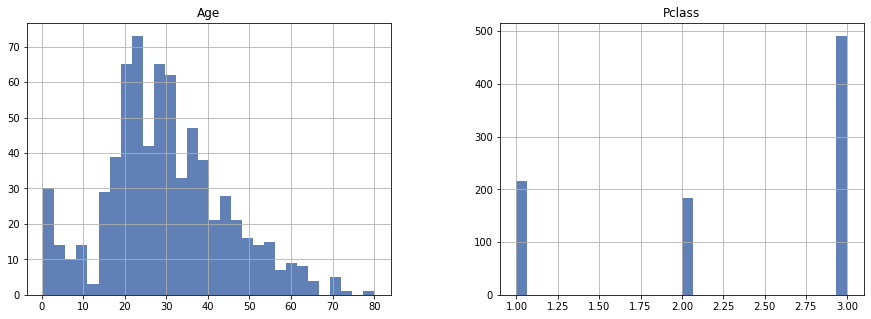

In [10]:
titanic_data.hist(column= ['Age','Pclass'],bins = 30, figsize = (15,5), color = '#6180B6')
plt.show()

In [11]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace = True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Balance de los datos(target) en el dataset

In [13]:
print('Número de personas que no sobrevivieron y que si sobrevivieron: ')
print(titanic_data['Survived'].value_counts())

Número de personas que no sobrevivieron y que si sobrevivieron: 
0    549
1    342
Name: Survived, dtype: int64


In [14]:
def porcentajeClases(output):
    percent = output.value_counts() 
    clase1 = (percent[0]*100)/(percent[0]+percent[1])
    clase2 = (percent[1]*100)/(percent[0]+percent[1])
    return (clase1, clase2)

In [15]:
[nosob, sob] = porcentajeClases(titanic_data['Survived'])
print('Porcentaje de personas que no sobrevivieron: {}%'.format(nosob))
print('Porcentaje de personas que sobrevivieron: {}%'.format(sob))

Porcentaje de personas que no sobrevivieron: 61.61616161616162%
Porcentaje de personas que sobrevivieron: 38.38383838383838%


Crear nuevo data set (sex,age,pclass)

In [16]:
titanic_data.set_index(['PassengerId'],inplace=True)

In [17]:
data_train = titanic_data[['Pclass','Sex','Age']]
data_train.head()

,Pclass,Sex,Age
PassengerId,,,
1,3,male,22.0
2,1,female,38.0
3,3,female,26.0
4,1,female,35.0
5,3,male,35.0


In [18]:
data_target = titanic_data['Survived']
data_target.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [19]:
print(data_train.iloc[52,:])
print("Survived: ", data_target.iloc[52])

Pclass         1
Sex       female
Age           49
Name: 53, dtype: object
Survived:  1


Transformar datos categóricos a numéricos

In [20]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(data_train.iloc[:,1])
print("Clases categóricas: ",label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_)
print("Clases numéricas: ",integer_classes)
t = label_encoder.transform(data_train.iloc[:,1])
data_train.iloc[:,1] = t
data_train.head()

Clases categóricas:  ['female' 'male']
Clases numéricas:  [0 1]


C:\Users\SantaCruz\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Pclass,Sex,Age
PassengerId,,,
1,3,1,22.0
2,1,0,38.0
3,3,0,26.0
4,1,0,35.0
5,3,1,35.0


Separación del dataset en un conjunto de entrenamiento y de prueba

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_target, test_size=0.2, random_state=0)

In [22]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

Visualización de árbol de decisión

In [23]:
from sklearn.tree import export_graphviz
from IPython.display import Image
dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = ['Pclass','Sex','Age'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5)
clf = clf.fit(X_train,y_train)

In [ ]:
dot_data = io.StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = ['Pclass','Sex','Age'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print('Precisión en el conjunto de entrenamiento: {}'.format(train_accuracy))
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Precisión en el conjunto de prueba: {}'.format(test_accuracy))

In [ ]:
print(pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True))

In [ ]:
print(classification_report(y_test,y_pred))